In [23]:
import cv2
import pickle
import matplotlib.pyplot as plt

# Load calibration data
with open("./data/stereo_calibration.pkl", "rb") as f:
    data = pickle.load(f)

print(data.keys())

cameraMatrix1 = data['left_K']
distCoeffs1   = data['left_dist']
cameraMatrix2 = data['right_K']
distCoeffs2   = data['right_dist']
R             = data['R']
T             = data['T']
image_size    = data['image_size']

# Compute rectification transforms
R1, R2, P1, P2, Q, roi1, roi2 = cv2.stereoRectify(
    cameraMatrix1,
    distCoeffs1,
    cameraMatrix2,
    distCoeffs2,
    image_size,
    R,
    T,
    flags=cv2.CALIB_ZERO_DISPARITY,
    alpha=-1
)

print("P1:\n", P1)
print("P2:\n", P2)


dict_keys(['left_K', 'left_dist', 'right_K', 'right_dist', 'R', 'T', 'E', 'F', 'image_size'])
P1:
 [[334.36086148   0.         363.7856636    0.        ]
 [  0.         334.36086148 305.59109879   0.        ]
 [  0.           0.           1.           0.        ]]
P2:
 [[ 3.34360861e+02  0.00000000e+00  3.63785664e+02 -1.99197640e+04]
 [ 0.00000000e+00  3.34360861e+02  3.05591099e+02  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00]]


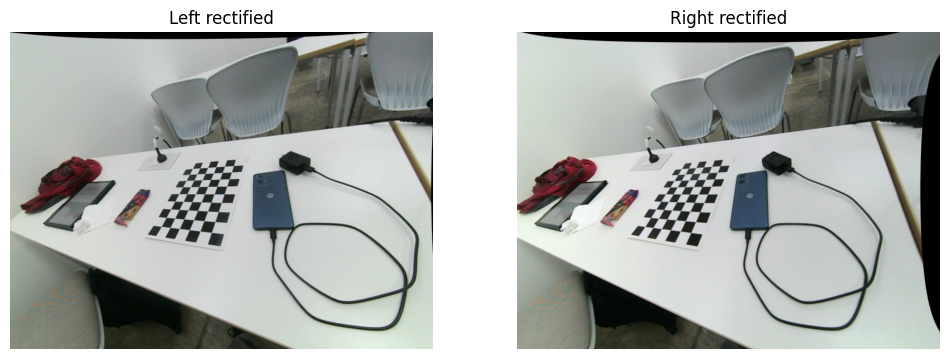

(np.float64(-0.5), np.float64(799.5), np.float64(599.5), np.float64(-0.5))

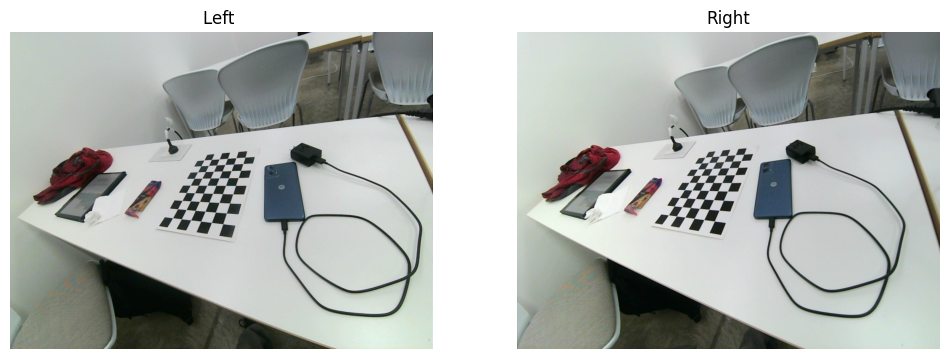

In [28]:
# Mapas de rectificación (izquierda y derecha)
left_image=cv2.imread("./data/calib/left_23.jpg")
right_image=cv2.imread("./data/calib/right_23.jpg")

left_image  = cv2.cvtColor(left_image,  cv2.COLOR_BGR2RGB)
right_image = cv2.cvtColor(right_image, cv2.COLOR_BGR2RGB)

map1x, map1y = cv2.initUndistortRectifyMap(
    cameraMatrix1, distCoeffs1, R1, P1, image_size, cv2.CV_32FC1
)

map2x, map2y = cv2.initUndistortRectifyMap(
    cameraMatrix2, distCoeffs2, R2, P2, image_size, cv2.CV_32FC1
)

# Aplicar los mapas a las imágenes
left_rectified  = cv2.remap(left_image,  map1x, map1y, cv2.INTER_LINEAR)
right_rectified = cv2.remap(right_image, map2x, map2y, cv2.INTER_LINEAR)


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(left_rectified)
plt.title("Left rectified")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(right_rectified)
plt.title("Right rectified")
plt.axis("off")

plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(left_image)
plt.title("Left ")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(right_image)
plt.title("Right")
plt.axis("off")